# COMMON MISTAKES
### Code oriented
* Overfit first batch
  - get batch by next(iter(loader))
  -To test on first batch until it reaches verge of overfitting.
* Forgot zero_grad - else accuml. gradients
* Bias in btchnorm - included, can set conv before bias=False
* model eval true/false -> for train layers like dropout+batchnorm
* Softmax with crossentropy - final layer already applied with cross.
* view vs. permute, does convenient vs. actual permute(special case-transpose)
  - basically view, according to shape given, stuffs first few objects according to first dim of shape, then repeats til filled
  - permute actually switches dimensions.
---
###Considering data:

* Data Augmentation ONLY IF GOOD
* Shuffling - not good if time step
* Normalizing data - find mean and std of data/channel, and pass to Normalize Transform layer(After transforms.ToTensor)
* Clipping gradients - after loss.backwards, nn.utils.clip_grad(model.parameters(), max_norm=1)

In [ ]:
# tutorial images
import os
import pandas as pd
from skimage import io


import torch
from torch.utils.data import Dataset

# Datasets Insights
## As custom models inherit, custom datasets also from Dataset in utils.data
* I also reference this tutorial for analysis: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
* For datasets, override init, len, getitem (all 2x 2x_)
* Datasets - len takes self, getitem self and index

* Import packages for handling types of data, skimage and io for images, +
* Of currently, there seems to require a csv of the data(filenames for images) of which are returned by getitem in custom way.

*Init - csv_path, root_dir for os navigation, transform for data transform, target_transform for label.
** Earlier used transform in datasets for ToTensor



In [ ]:
class CatsAndDogDataset(Dataset):
  def __init__(self, csv_file, root_dir, transform=None):
    self.annotations = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform
  def __len__(self):
    return len(self.annotations)
  def __getitem__(self, index):
    img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0]) # tuple, data 0, label 1
    image = io.imread(img_path)
    y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

    if self.transform:
      image = self.transform(image)
    return [image, y_label]

In [ ]:
# import rest
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
# init and -> dataloader
dataset = CatsAndDogDataset(csv_file = 'cats_dogs.csv', root_dir = 'cats_dogs_resized', transform = transforms.ToTensor())

#similar to train_test_split
train_set, test_set = torch.utils.data.random_split(dataset, [7, 3]) # provision

#then to dataloaders in the same way.
batch_size = 32
train_loader = DataLoader(dataset=train_set, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size = batch_size, shuffle=True)


# Data Augmentation Insights (Skipped Text)
## Instead of transforms -> ToTensor(), use transforms.Compose (basicallly chaining tfs like transformers in tf)

## For the previous dst, uses transforms.methods
* Flips - RandomHorizontalFlip(p=0-1 decimal on how transformed) and RandomVerticalFlip(same)
* Sizing - Resize(tuple), RandomCrop(sub_tuple), CenterCrop(tuple)
* Dtypes - .ToPILImage, toTensor,
* Color - ColorJitter() #random on brightness, concentration, saturation and hue properties(0-1), RandomGreyScale(p=0-1)
* Distribution - Normalize([means], [std for all dimensions]) - best at end



In [ ]:
# On own after video
for (img, label) in dataset:
  print(img.shape)

custom_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(0.1),
    transforms.Resize((200, 200)),
    transforms.RandomCrop((150, 150)),
    transforms.ColorJitter(brightness=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.0, 0.0, 0.0], [1.0, 1.0, 1.0]),
])

# Copied code of dst -->
dataset = CatsAndDogDataset(csv_file = 'cats_dogs.csv', root_dir = 'cats_dogs', transform = custom_transform)
# <-- ends

for (img, label) in dataset:
  print(img.shape)
# again, the usual dst-> loader

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 150, 150])
torch.Size([3, 150, 150])
torch.Size([3, 150, 150])
torch.Size([3, 150, 150])
torch.Size([3, 150, 150])
torch.Size([3, 150, 150])
torch.Size([3, 150, 150])
torch.Size([3, 150, 150])
torch.Size([3, 150, 150])
torch.Size([3, 150, 150])


# Albumentations Library testing
#### More options and better than torchvision(all aspects)

* A.Compose like in previous example
* p in the parameters of the methods, are prob executed
* Sizing - Resize(width, height), RandomCrop(subw, subh)
* Flips+Rotations - Rotate(limit = angle, p), HorizontalFlip(p), VerticalFlip(p)
* Colors - ColorJitter(p), A.Blur(blur_limit = num, p), RGBShift(r_shift_limit, same g,b, p)
*OneOf([list_transforms], p), Inside probs must = 1
---
*Passed argument to A.Compose, image=image, and mask = mask(list use masks=[], of which can ["image"] and ["mask"] for segmentation

---
For object detection, beside passing list of tfs to Compose, can pass bbox_params = A.BboxParams(format = "pascal_voc", min_visibility=0.3, min_area=2048,  label_fields = []), send instead of mask, bboxes, of which ["bboxes"] returns list of bounding boxes, if 1, then ["bboxes"][0]






In [ ]:
import albumentations as A

#extra libraries
import cv2
import numpy as np
#from utils import plot_examples
from PIL import Image
#https://www.youtube.com/watch?v=rAdLwKJBvPM



In [ ]:
!pip install utils

In [ ]:
# Follow last example in tutorial

In [ ]:
import torch
import numpy as np
import cv2
from PIL import Image
import torch.nn as nn
import albumentations as A
from albumentations.pytorch import ToTensorV2
import os


In [ ]:
transform = A.Compose(
    [
        A.Resize(width = 1920, height = 1080),
        A.RandomCrop(width=1280, height = 720),
        A.Rotate(limit = 40, p = 0.9, border_mode = cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.1),
        A.RGBShift(r_shift_limit = 25, g_shift_limit = 25, b_shift_limit = 25, p=0.9),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5),
        ], p= 1.0),
        #ToTensor() -> Normalize for Normalize, ToTensor here does not divide by 255
        A.Normalize(
            mean = [0,0,0],
            std = [1,1,1],
            max_pixel_value = 255, #
        ),
        ToTensorV2(),
    ]
)

class ImageFolder(nn.Module):
  def __init__(self, root_dir, transform=None):
    super(ImageFolder, self).__init__()
    self.data = []
    self.root_dir = root_dir
    self.transform = transform
    self.class_names = os.listdir(root_dir)
    # want (cat_0.jpg, 0)...(dog_0.jpg, 1) ..
    for index, name in enumerate(self.class_names):
      files = os.listdir(os.path.join(root_dir, name))
      self.data += list(zip(files, [index]*len(files)))

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    img_file, label = self.data[index] # from zip dict
    root_and_dir = os.path.join(self.root_dir, self.class_names[label])
    image = np.array(Image.open(os.path.join(root_and_dir, img_file)))

    if self.transform is not None:
      augmentations = self.transform(image=image) # bboxes = bboxes, masks = [masks]
      image = augmentations["image"]
    return image, label

print(os.listdir("cats_dogs"))
dataset = ImageFolder(root_dir = "cats_dogs", transform = transform)


['cats', 'Dogs', '.ipynb_checkpoints']


In [ ]:
#50/50 flip custom
transform = A.Compose(
    [
      A.OneOf([
          A.HorizontalFlip(p=0.5),
          A.VerticalFlip(p=0.5),
      ], p=1)
    ]
)
dataset = ImageFolder(root_dir = "cats_dogs", transform = transform)

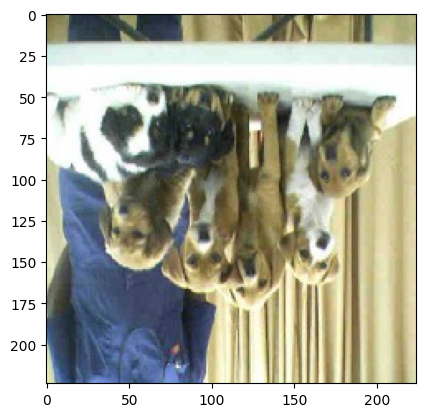

In [ ]:
import matplotlib.pyplot as plt

for img, label in dataset:
  plt.imshow(img)

# Imbalanced Datasets
## Two methods: Oversampling and Class Weighting.

* Class weighting - loss function pass tensor to weights param (really simple)
*ie. adapting to this dataset - Pearson uses a different dataset - retriever and another dog.
---
* Oversampling - pass weight array, num_samples, and replacement=True to a sampler, the weight array is a array of the weights given for each class on each example.
* Pass sampler to DataLoader sampler param.

In [ ]:
# Easy class weighting
# crossentropy function
lossfn = nn.CrossEntropyLoss(weight=torch.Tensor([2, 8]))

In [ ]:
# oversampling
from torch.utils.data import WeightedRandomSampler, DataLoader
def get_loader(root_dir, batch_size, dst):
  #do transforms, get dst
  #I am just going to use the dataset above.

  class_weights = [8,2]
  sample_weights = [0] * len(dst)

  #use 0, 1 label to get class_weights position 0, 1
  for idx, (data, label) in enumerate(dst):
    class_weight = class_weights[label]
    sample_weights[idx] = class_weight

  sampler = WeightedRandomSampler(weights=class_weights, num_samples = len(dst), replacement=True)
  loader = DataLoader(dataset, batch_size=batch_size, sampler = sampler)
  return loader

loader = get_loader("cats_dogs", 1,  dataset)
num_dogs, num_cats = 0,0
for i in range(10):
  for data, targets in loader:
    num_dogs += torch.sum(targets==1)
    num_cats += torch.sum(targets == 0)
print(num_dogs)
print(num_cats)

tensor(0)
tensor(100)
